In [1]:
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import csv
import os
import numpy as np
import json
from sklearn.manifold import TSNE

In [2]:
meta = None
with open('./scraped/metadata.json') as f:
    meta = json.load(f)

In [3]:
index2name = []
for m in meta:
    index2name.append(m.get('name'))

In [4]:
index2name[:5]

['Bitcoin', 'Ethereum', 'BNB', 'XRP', 'Cardano']

In [5]:
embed = []
for m in meta:
    feats = np.array([m.get('market_cap'), m.get('fully_diluted_market_cap'), m.get('circulating_supply'), m.get('total_supply')])
    embed.append(feats)
embed = np.array(embed)

In [6]:
cos_sim = cosine_similarity(embed)

In [12]:
def condense(G):
    nodelist = []
    nodesize = []
    for c in nx.community.label_propagation_communities(G):
        nodesize.append(len(c))
        nodelist.append(list(c)[0])
        for n in (c):
            G = nx.contracted_nodes(G, list(c)[0], n, copy=False, self_loops=False)
    return nodelist, nodesize

In [13]:
G = nx.Graph()
for i, v in enumerate(cos_sim):
    for j, u in enumerate(v):
        if(u > .99 and i != j):
            G.add_edge(i, j)



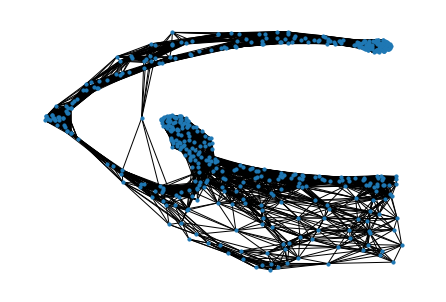

In [14]:
nx.draw(G, node_size=10)
plt.show()

In [15]:
G_top_five = nx.Graph()
cos_sim = cosine_similarity(embed)
for i, n in enumerate(cos_sim):
    for v in (n.argsort()[-6:-1]):
        G.add_edge(i, v)

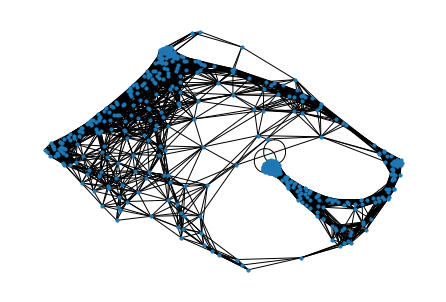

In [16]:
nx.draw(G, node_size=10)
plt.show()